<a href="https://colab.research.google.com/github/melder2/MLA_MRE/blob/main/FinalProject_Classification_MRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Michael Elder**  

## Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/name_gender_dataset.csv')

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'M' else 0)

### Statistical and Visual Exploration

In [ ]:
df.head()

,Name,Gender,Count,Probability
0,James,1,5304407,0.014517
1,John,1,5260831,0.014398
2,Robert,1,4970386,0.013603
3,Michael,1,4579950,0.012534
4,William,1,4226608,0.011567


In [ ]:
df.describe

<bound method NDFrame.describe of            Name  Gender    Count   Probability
0         James       1  5304407  1.451679e-02
1          John       1  5260831  1.439753e-02
2        Robert       1  4970386  1.360266e-02
3       Michael       1  4579950  1.253414e-02
4       William       1  4226608  1.156713e-02
...         ...     ...      ...           ...
147264   Zylenn       1        1  2.736740e-09
147265   Zymeon       1        1  2.736740e-09
147266   Zyndel       1        1  2.736740e-09
147267   Zyshan       1        1  2.736740e-09
147268    Zyton       1        1  2.736740e-09

[147269 rows x 4 columns]>

In [ ]:
df.dtypes

Name            object
Gender           int64
Count            int64
Probability    float64
dtype: object

### Splitting Data into Train/Test

In [ ]:
X = df[['Count','Probability']]
y = df[['Gender']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [ ]:

num_values = ['Count','Probability']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                   
                   ('num', MinMaxScaler(), num_values)],
                   remainder='passthrough'       
)

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('mlg_model', LogisticRegression(max_iter=1000))
])

In [ ]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Count', 'Probability'])])),
                ('mlg_model', LogisticRegression(max_iter=1000))])

### Executing the Model

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Count', 'Probability'])])),
                ('mlg_model', LogisticRegression(max_iter=1000))])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

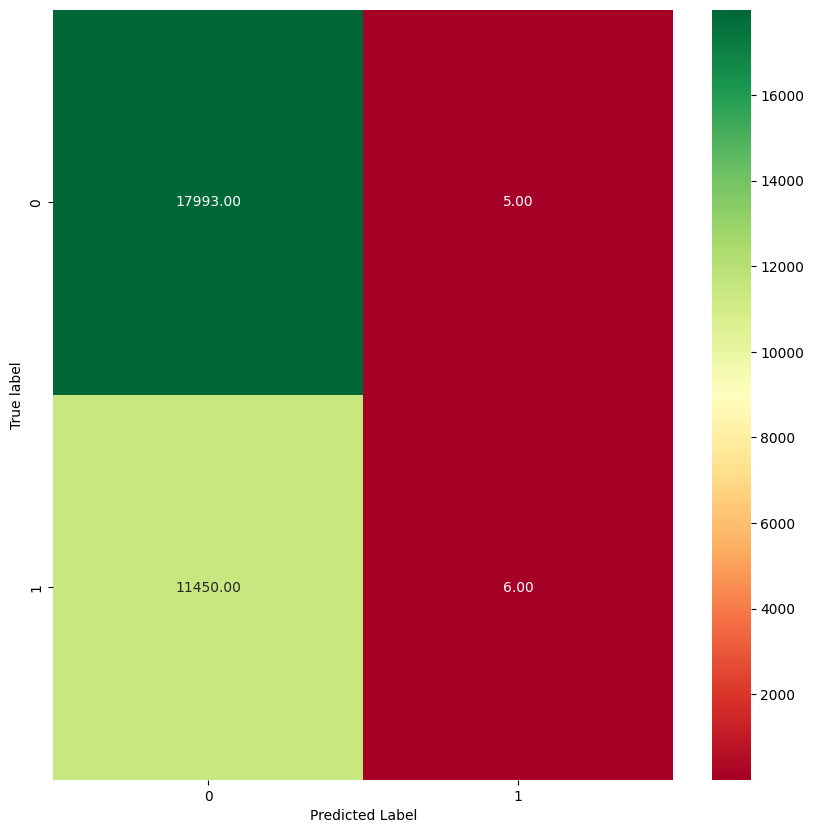

In [ ]:
plot_cm(y_test, y_pred)

0 is female and 1 is male...The algorithm predicted a 0 and it was a 0 17,993 times. Algorithm predicted a 1 and it was a 0 5 times. The algorithm predicted a 1 when it was a 0 11,450 times. Algorithm predicted a 1 and it was a 1 6 times. This algorithm is much better for precision (54%) then recall (.1%) which makes the f1 score very low and the algorithm not efficient

In [ ]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5454545454545454
0.0005237430167597765
0.0010464812069416588


0.48310117606565217


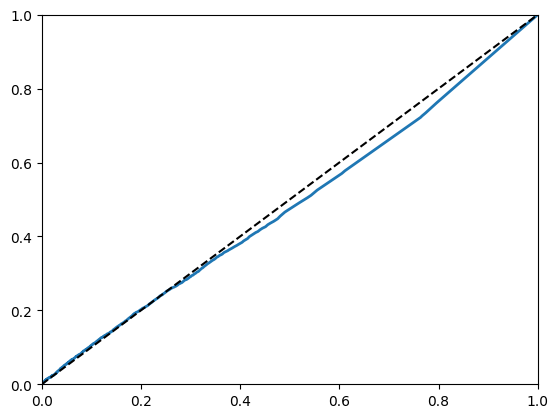

In [ ]:
y_pred_proba = pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

In [ ]:
df.Gender.groupby(df.Gender).count()

Gender
0    89749
1    57520
Name: Gender, dtype: int64

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_proba)

<function matplotlib.pyplot.legend(*args, **kwargs)>

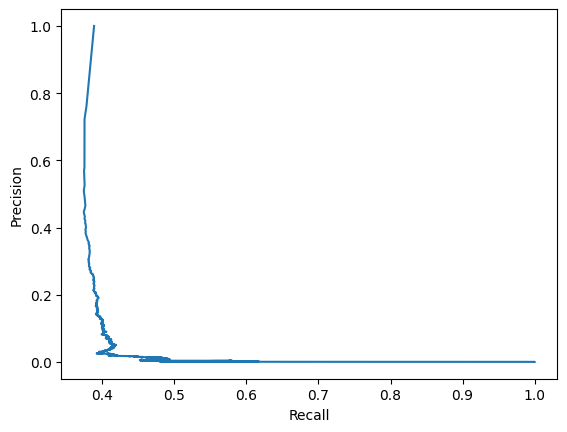

In [ ]:
plt.plot(lr_precision, lr_recall, label='logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend

In [ ]:
auc(lr_recall, lr_precision)

0.3859403288925832

### Conclusion
roc_auc_curve is 48% and auc is 38.6%


## Problem 2

### Reading the Data

### Splitting Data into Train/Test

### Building the Pipeline

In [ ]:

pipeline = Pipeline([
    ('transform', col_transform),
    ('decision_tree',tree.DecisionTreeRegressor(max_depth=5))
])

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Count', 'Probability'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

### Executing the Model

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred1 = pipeline.predict(X_train)

In [ ]:
print(mean_squared_error(y_test, y_pred)**0.5)

0.4870374749429969


In [ ]:
print(mean_squared_error(y_train, y_pred1)**0.5)

0.4874598058634726


The testing data performed better than the testing data based on mean squared error

### Conclusion
The root mean squared error for both training set and test set was very low so it is a very suitable model for predicting gender.